<a href="https://colab.research.google.com/github/viraj-lakshitha/Data-Science-Projects/blob/main/Artificial_Neural_Network_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program detect person has diabetic or not using Neural Network

---





In [1]:
# Load Libraries 
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load the Data
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
# Store the dataset
df = pd.read_csv('diabetes.csv')

# Print
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
# Show the shape of the data  (# Coloum ands Rows)
df.shape

(768, 9)

In [5]:
# Check the Duplicates and Remove them
df.drop_duplicates(inplace= True)

# Show the shape of the data  (# Coloum ands Rows)
df.shape

(768, 9)

In [6]:
# Show the Number of Missing Data 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Covert the data into array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
# Get the all of the rows from the first eight coloum of the dataset
X = dataset[:, 0:8]
Y = dataset[:, 8]


In [9]:
# Process the Data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [10]:
#Split the data into 80% training and 20% test
X_train , X_test ,y_train , y_test = train_test_split(X_scale, Y, test_size = 0.2 , random_state = 4)

In [12]:
# Build the Model
model = Sequential([
                    Dense(12,activation='relu', input_shape=(8,)),
                    Dense(15,activation='relu'),
                    Dense(1,activation='sigmoid')
])

In [13]:
# Complile the model
model.compile (
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [19]:
# Train the model
hist = model.fit(X_train, y_train, batch_size=57, epochs=1000, validation_split=0.2)

Epoch 1/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.4554 - accuracy: 0.7760 - val_loss: 0.5128 - val_accuracy: 0.7561
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.7780 - val_loss: 0.5127 - val_accuracy: 0.7236
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7780 - val_loss: 0.5132 - val_accuracy: 0.7642
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.7739 - val_loss: 0.5131 - val_accuracy: 0.7642
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7780 - val_loss: 0.5127 - val_accuracy: 0.7561
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7800 - val_loss: 0.5126 - val_accuracy: 0.7236
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.7739 - val_loss: 0.5125 - val_accuracy: 0.7317
Epoch 8/1000
9/9 [==

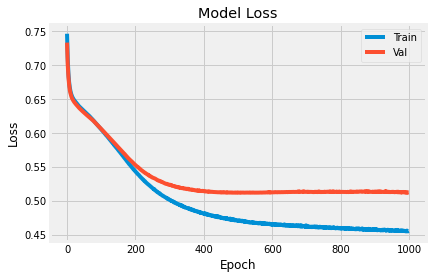

In [15]:
# Visulizing the training lost and the validation lost to see if model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'upper right')
plt.show()

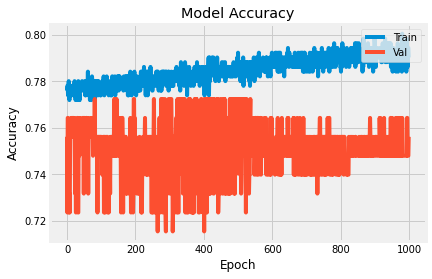

In [24]:
# Visulizing the training accuracy and the validation accuracy to see if model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'upper right')
plt.show()

In [28]:
# Make a prediction and print the actuyal value of the trian model
prediction = model.predict(X_test)
prediction = [1 if y>= 0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [31]:
# Evalate the the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = model.predict(X_train)
pred = [1 if y>= 0.5 else 0 for y in pred]
print(classification_report(y_train,pred))
print('Confution Data Set Matrix : \n',confusion_matrix(y_train, pred))
print()
print('Accuracy', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       398
         1.0       0.73      0.58      0.65       216

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614

Confution Data Set Matrix : 
 [[352  46]
 [ 90 126]]

Accuracy 0.7785016286644951


In [33]:
# Evalate the the model on the testing data set
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = model.predict(X_test)
pred = [1 if y>= 0.5 else 0 for y in pred]
print(classification_report(y_test,pred))
print('Confution Data Set Matrix : \n',confusion_matrix(y_test, pred))
print()
print('Accuracy', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       102
         1.0       0.68      0.65      0.67        52

    accuracy                           0.78       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

Confution Data Set Matrix : 
 [[86 16]
 [18 34]]

Accuracy 0.7792207792207793
